# Installing Tensorflow and Keras Libraries

In [1]:
pip install tensorflow

In [2]:
pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
pip install keras

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.12.0'

# Artificial Neural Network Application

## Importing libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Loading dataset

In [7]:
df = pd.read_csv('D16data1.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## EDA

In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Analyzing 'Gender'

In [11]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

(array([4543.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5457.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

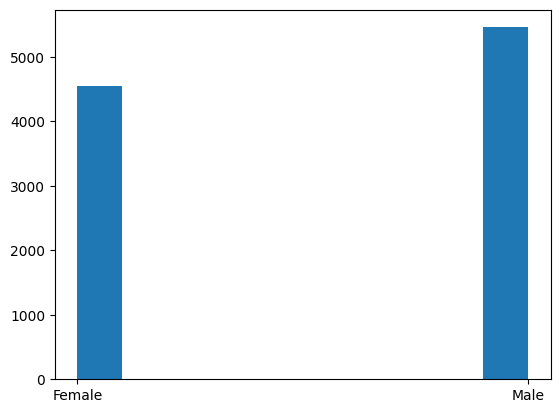

In [12]:
plt.hist(x = df.Gender)

## Analyzing 'Age'

In [13]:
df.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

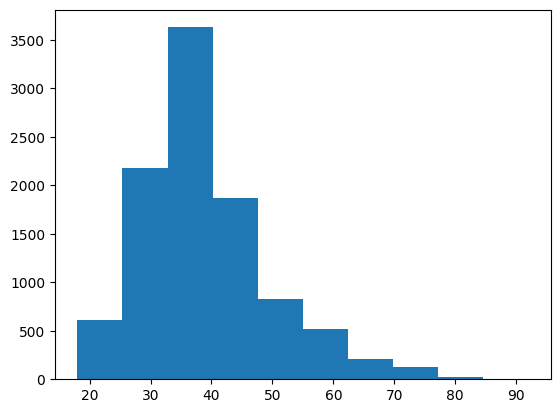

In [14]:
plt.hist(x = df.Age)

## Analyzing 'Geography'

In [15]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

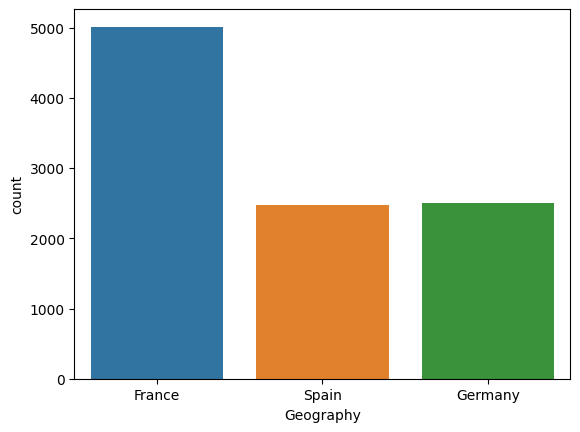

In [16]:
sb.countplot(x = df.Geography)

## Identify x and y

In [17]:
x = df.iloc[:,3:-1].values
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [18]:
y = df.iloc[:,-1].values
y

array([1, 0, 1, ..., 1, 1, 0])

## Convert Categorical Data

In [19]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
x[:,1] = la.fit_transform(x[:,1])

In [20]:
x[:,2] = la.fit_transform(x[:,2])

In [21]:
x

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Model building for ANN

## Initialize the ANN

In [25]:
ann = tf.keras.models.Sequential()

## Adding the input layer and the hidden layer

In [26]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Adding the hidden layer

In [27]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Adding output layer

In [28]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Compiling the ANN model

In [29]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the model

In [37]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8605
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8626
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8622
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8627
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8626
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8618
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8624
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8631
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8636
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3348 - accura

## Prediction

In [31]:
y_pred = ann.predict(x_test)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.19695872],
       [0.3222475 ],
       [0.22588268],
       ...,
       [0.19524248],
       [0.10525661],
       [0.19388632]], dtype=float32)

In [33]:
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Evaluation

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

### Confusion Matrix

In [35]:
confusion_matrix(y_pred,y_test)

array([[1519,  203],
       [  76,  202]])

### Accuracy Score

In [36]:
accuracy_score(y_pred,y_test)

0.8605